This notebook defines functions for obtaining heights and incoherence as per MacKay et al (2020) and applies these to three small networks: one perfectly coherent; one semi-coherent; the other perfectly incoherent.

Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import networkx as nx 
%matplotlib inline

Define functions to get trophic levels and trophic incoherence

In [2]:
def get_trophic_levels(G):
    G2 = G.to_undirected(reciprocal=False,as_view=True)
    if nx.is_connected(G2):
        B = nx.adj_matrix(G).todense()
        in_deg = np.array([G.in_degree()[node] for node in G.nodes])
        out_deg = np.array([G.out_degree()[node] for node in G.nodes])
        v = in_deg - out_deg
        L = np.diag(in_deg+out_deg) - (B + B.transpose())
        L[0,0]=0
        h = np.linalg.solve(L, v)
        h=h-min(h)
        h=np.round(h,decimals=10)
        return h
    else:
        print(f'Network must be weakly connected')

In [3]:
def get_trophic_coherence(G):
    h = get_trophic_levels(G)
    B = nx.adj_matrix(G).todense()
    N = len(h)
    H = np.empty((N,N))
    for m in range(N):
        for n in range(N):
            H[m,n] = (h[n] - h[m] - 1) ** 2
    F_0 = np.sum(np.multiply(B,H)) / np.sum(B)
    return F_0, h

Define some networks: a perfectly coherent, semi-coherent and perfectly incoherent example

In [4]:
G_semi_coherent=nx.DiGraph()
G_semi_coherent.add_edges_from([(1,4),(1,5),(2,5),(3,5),(3,6),(4,7),(5,7),(5,8),(5,9),
                  (6,9),(1,7),(2,8),(3,9),(1,8),(2,7),(2,9)])
G_coherent=nx.DiGraph()
G_coherent.add_edges_from([(1,4),(1,5),(2,5),(3,5),(3,6),(4,7),(5,7),(5,8),(5,9),(6,9)])

G_incoherent=nx.DiGraph()
G_incoherent.add_edges_from([(1,2), (2,3),(3,1)])

Analyse these (F_0, and h)

F_0 coherent: 0.0
h: [0. 1. 1. 0. 0. 1. 2. 2. 2.]


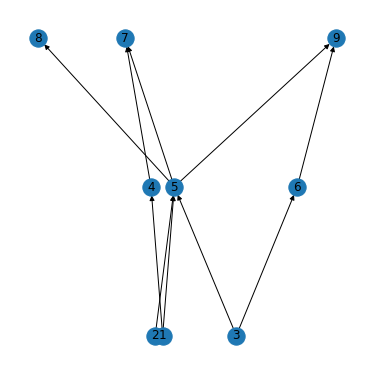

In [5]:
G=G_coherent
F,h=get_trophic_coherence(G)
pos = nx.spring_layout(G)

trophic_levels = {}
for i, node in enumerate(G.nodes):
    trophic_levels[node] = h[i]
for node in G_coherent.nodes:
    pos[node][1] = trophic_levels[node]
    
plt.figure(figsize = (5,5))
nx.draw(G, pos=pos);
nx.draw_networkx_labels(G, pos=pos);
print(f'F_0 coherent: {round(F,4)}')
print(f'h: {h}')

F_0 semi-coherent: 0.1003
h: [0.147 0.835 0.809 0.303 0.    0.73  1.524 1.42  1.461]


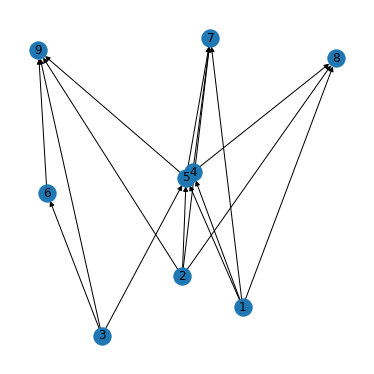

In [7]:
G=G_semi_coherent
F,h=get_trophic_coherence(G)

pos = nx.spring_layout(G)
trophic_levels = {}
for i, node in enumerate(G.nodes):
    trophic_levels[node] = h[i]
for node in G_coherent.nodes:
    pos[node][1] = trophic_levels[node]
    
plt.figure(figsize = (5,5))
nx.draw(G, pos=pos);
nx.draw_networkx_labels(G, pos=pos);
print(f'F_0 semi-coherent: {round(F,4)}')
print(f'h: {np.round(h,3)}')

F_0 incoherent: 1.0
h: [0. 0. 0.]


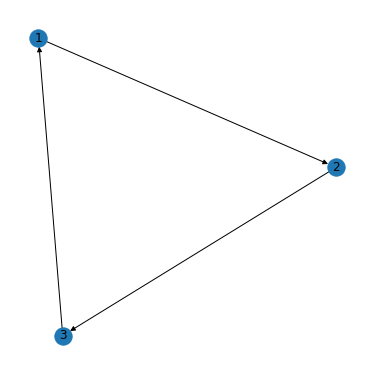

In [8]:
G=G_incoherent
F,h=get_trophic_coherence(G)
pos = nx.spring_layout(G)
plt.figure(figsize = (5,5))
nx.draw(G, pos=pos);
nx.draw_networkx_labels(G, pos=pos);
print(f'F_0 incoherent: {round(F,4)}')
print(f'h: {h}')